<h3>Regularised regression</h3>
<p>Our original squared loss function in matrix/vector notation is:
$$ L = \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Here's another loss function:
$$ L = \lambda \mathbf{w}^T\mathbf{w} + \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Recall that we're minimising this function and so (if $\lambda>0$) this additional term will penalise large positive and negative values in $\mathbf{w}$. $\lambda$ controls how much influence this new term has over the original squared error term.</p>

<p>Differentiating this with respect to $\mathbf{w}$ and then setting to zero (this is a good exercise to do) results in:
$$ (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
where $\mathbf{I}$ is a square matrix with ones on the diagonal and zeros elsewhere (the identity matrix).</p>

<p>To demonstrate the effect of this additional term, we will generate some synthetic data by using a quadratic function and assing some random (normal / Gaussian) noise.</p>

lampda 0 Mean Square Error = 0.42850198451
lampda 0.01 Mean Square Error = 0.428184771194
lampda 0.1 Mean Square Error = 0.428798717197
lampda 0.5 Mean Square Error = 0.431633482214
lampda 1 Mean Square Error = 0.434602403713
lampda 3 Mean Square Error = 0.441447009403
lampda 5 Mean Square Error = 0.445175132563
lampda 10 Mean Square Error = 0.451159779653
lampda 20 Mean Square Error = 0.459317211143
lampda 25 Mean Square Error = 0.462576132834


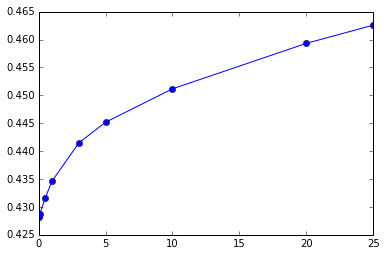

In [10]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
%matplotlib inline
import pylab as plt
    
N = data.shape[0] #get tupple (numRows, numCols)
np.random.shuffle(data)

train = data[:int(N*0.7)]
test = data[int(N*0.7):]
X_train = train[:,:11]
X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
q_train = train[:,11]

X_test = test[:,:11]
X_test = np.c_[np.ones(test.shape[0]), X_test]
q_test = test[:,11]

lambs = [0,0.01,0.1,0.5,1,3,5,10,20,25]
errors = []
for lamb in lambs:
    w = np.linalg.solve(np.dot(X_train.T,X_train) + lamb*np.identity(12),np.dot(X_train.T,q_train))
    f_test = np.dot(X_test,w)
    meanSquareError = ((q_test-f_test)**2).mean()
    errors += [meanSquareError]
    print "lampda", lamb, "Mean Square Error =", meanSquareError
    #plt.figure()
    #plt.scatter(f_test,q_test, color='blue')
    
plt.plot(lambs, errors, '-o')
plt.show()


<h4>Creating $\mathbf{X}$</h4>

In [3]:
maxorder = 5
x_test = np.linspace(0,10,30)[:,None]
X = np.ones_like(x)
print X
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i))
    X_test = np.hstack((X_test,x_test**i))

NameError: name 'x' is not defined

<h4>Loop over different values of $\lambda$</h4>

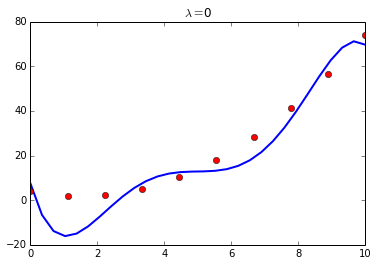

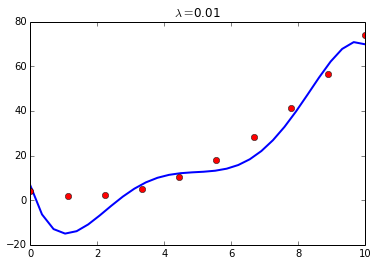

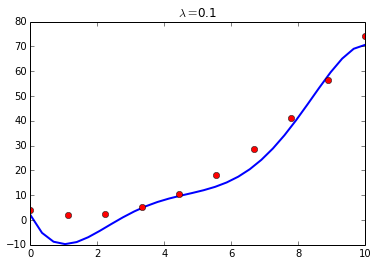

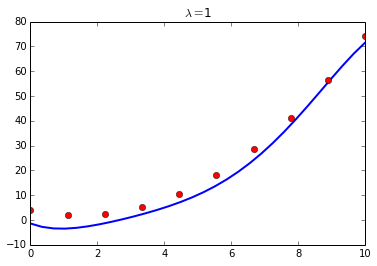

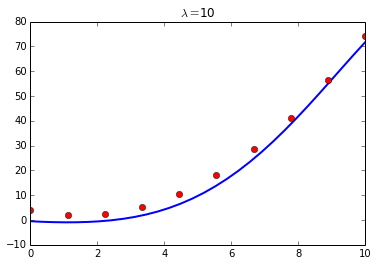

In [7]:
for lamb in [0,0.01,0.1,1,10]:
    w = np.linalg.solve(np.dot(X.T,X) + lamb*np.identity(maxorder+1),np.dot(X.T,t))
    f_test = np.dot(X_test,w)
    plt.figure()
    plt.plot(x_test,f_test,'b-',linewidth=2)
    plt.plot(x,y,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)


<p>As $\lambda$ increases, high values in $\mathbf{w}$ are more heavily penalised which leads to *simpler* functions. Why do lower values correspond to simpler functions?</p>
<p>Firstly, what does *simpler* mean?</p>
<p>I would argue that simpler functions have smaller derivatives (first, second, etc) as they typically change more slowly. In our polynomials, the derivatives are dependent on the values of $\mathbf{w}$. In particular our polynomial is:
$$ t = \sum_{d=0}^D w_d x^d $$
and the first derivative is:
$$ \frac{dt}{dx} = \sum_{d=1}^D dw_d x^{d-1} $$
and second is:
$$ \frac{d^2t}{dx^2} = \sum_{d=2}^D d(d-1)w_d x^{d-2} $$
which in both cases increases with increasing values of $w_d$. So penalising high (positive and negative) values decreases (in general) the gradients (and gradients of gradients, etc).</p> 